DATASET LINK :https://www.kaggle.com/datasets/niyalthakkar/data-science-jobs-analysis

In [1]:
# Write this command on top to autocomplete text , it improves working speed
%config Completer.use_jedi = False

# IMPORT LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("ds.salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# IDENTIFYING MISSING AND DUPLICATE VALUES

In [4]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
df.duplicated().sum()

0

# FEATURE SELECTION

In [6]:
df.drop(columns = ['Unnamed: 0','salary','salary_currency','employee_residence','company_size'], inplace = True)

In [7]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location
0,2020,MI,FT,Data Scientist,79833,0,DE
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP
2,2020,SE,FT,Big Data Engineer,109024,50,GB
3,2020,MI,FT,Product Data Analyst,20000,0,HN
4,2020,SE,FT,Machine Learning Engineer,150000,50,US


# DATA UNDERSTANDING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         607 non-null    int64 
 1   experience_level  607 non-null    object
 2   employment_type   607 non-null    object
 3   job_title         607 non-null    object
 4   salary_in_usd     607 non-null    int64 
 5   remote_ratio      607 non-null    int64 
 6   company_location  607 non-null    object
dtypes: int64(3), object(4)
memory usage: 33.3+ KB


In [9]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


## Observation based on above figure:
### 1) min salary is 2859 USD
### 2) avg salary is 1,12,297 USD
### 3) max salary is 6,00,000 USD 

In [10]:
# CATEGORICAL VARIABLE UNDERSTANDING
df['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [11]:
df['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [12]:
# FULL FORM OF ABBREVIATIONS
#     'SE': 'Senior',
#     'MI': 'Mid',
#     'EN': 'Entry',
#     'EX': 'Executive'

#     'FT': 'Full-time',
#     'PT': 'Part-time',
#     'CT': 'Contract',
#     'FL': 'Freelance

In [13]:
df['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

# PREPROCESSING

In [14]:
# TRANSFORMING ABBREVIATIONS INTO FULL FORM FOR BETTER UNDERSTANDING
df['employment_type'] =  df['employment_type'].map({"FT":"Full Time","PT":"Part Time","CT":"Contract","FL":"Freelance"})
df['experience_level'] =  df['experience_level'].map({"SE":"Senior","MI":"Mid","EN":"Entry","EX":"Executive"})

# CONVERTING REMOTE_RATIO VALUES INTO WORK TYPE NAMES LIKE : REMOTE,HYBRID AND ONSITE
df['remote_ratio'] = df['remote_ratio'].map({100:"Remote",0:"Onsite",50:"Hybrid"})

In [15]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location
0,2020,Mid,Full Time,Data Scientist,79833,Onsite,DE
1,2020,Senior,Full Time,Machine Learning Scientist,260000,Onsite,JP
2,2020,Senior,Full Time,Big Data Engineer,109024,Hybrid,GB
3,2020,Mid,Full Time,Product Data Analyst,20000,Onsite,HN
4,2020,Senior,Full Time,Machine Learning Engineer,150000,Hybrid,US


In [16]:
# NOW LETS CONVERT THE LOCATIONS CODE INTO FULL NAME
# INSTALL CONVERTER FOR THIS TASK

! pip install country_converter 

In [17]:
import country_converter as coco

In [18]:
# NOTE: IT AUTOMATICALLY DETECTS CODE AND CONVERT INTO FULL NAME OF COUNTRIES
df['company_location'] = coco.convert(df['company_location'],to = 'name_short',not_found = None)

In [19]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location
0,2020,Mid,Full Time,Data Scientist,79833,Onsite,Germany
1,2020,Senior,Full Time,Machine Learning Scientist,260000,Onsite,Japan
2,2020,Senior,Full Time,Big Data Engineer,109024,Hybrid,United Kingdom
3,2020,Mid,Full Time,Product Data Analyst,20000,Onsite,Honduras
4,2020,Senior,Full Time,Machine Learning Engineer,150000,Hybrid,United States


In [20]:
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

##### BELOW IS THE FINAL CLEANED DATA

In [21]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location
0,2020,Mid,Full Time,Data Scientist,79833,Onsite,Germany
1,2020,Senior,Full Time,Machine Learning Scientist,260000,Onsite,Japan
2,2020,Senior,Full Time,Big Data Engineer,109024,Hybrid,United Kingdom
3,2020,Mid,Full Time,Product Data Analyst,20000,Onsite,Honduras
4,2020,Senior,Full Time,Machine Learning Engineer,150000,Hybrid,United States


# PERFORMING EDA (Exploratory Data Analysis)

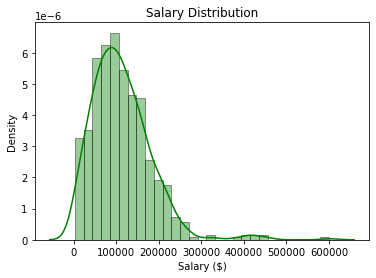

In [22]:
# LETS PLOT THE SALARY DISTRIBUTION

sns.distplot(df['salary'],kde=True,color="green",hist_kws={"edgecolor":"black"})
plt.title("Salary Distribution")
plt.xlabel("Salary ($)")
plt.show()

### Obsevation based on above plot : 
#### 1) There are few people whose salary is greater than 3L US Dollar

# ________________________________________________________________________________________________________________________________________

##### QUES1 : what are top 10 countries offering highest data science job?
##### QUES 2: what are the top 10 job openings in data science?

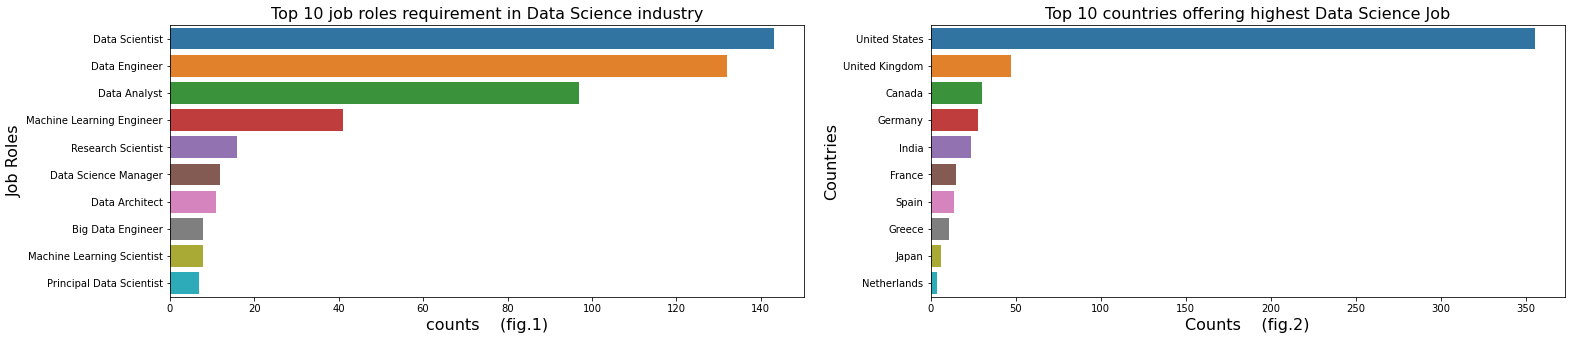

In [23]:
# what are top 10 countries offering highest data science job?
plt.figure(figsize=(25,5))
plt.subplot(1,2,2)
top_country_count = df['company_location'].value_counts()[:10]
sns.barplot(top_country_count,top_country_count.index)
plt.title("Top 10 countries offering highest Data Science Job",fontdict={"fontsize":16})
plt.xlabel("Counts    (fig.2)",fontdict={"fontsize":16})
plt.ylabel("Countries",fontdict={"fontsize":16})

# what are the top 10 job openings in data science?
plt.subplot(1,2,1)
top_jobs_count = df['job_title'].value_counts()[:10]
sns.barplot(top_jobs_count,top_jobs_count.index)
plt.title("Top 10 job roles requirement in Data Science industry",fontdict={"fontsize":16})
plt.xlabel("counts    (fig.1)",fontdict={"fontsize":16})
plt.ylabel("Job Roles",fontdict={"fontsize":16})
plt.show()


### Observations based on fig.1
#### 1) Data Scientist is top 1st job role offered by data science
#### 2) Data Engineer is 2nd top role among all job roles in data science 
#### 3) No. of openings in Data Analyst role are less than Data Eengineer

### Observations based on fig.2
#### 1) US is top 1st country offering highest data science job
#### 2) UK is top 2nd country offering data science job
#### 3) India is top 5th country offering data science job

#### QUES3: WHAT ARE THE TOP 10 COUNTRIES PAYING HIGHEST SALARY?
#### QUES4: WHAT ARE THE TOP 10 JOB ROLES THE HIGHEST AVERAGE SALARY?

In [24]:
# lets group the salary based on country and then find the mean
# arrange all the data in descending order then apply slicing on top 10 values

top_country_salary = df.groupby('company_location')['salary'].agg('mean').sort_values(ascending = False)[:10]
top_country_salary

company_location
Russia                  157500.000000
United States           144055.261972
New Zealand             125000.000000
Israel                  119059.000000
Japan                   114127.333333
Australia               108042.666667
Iraq                    100000.000000
United Arab Emirates    100000.000000
Algeria                 100000.000000
Canada                   99823.733333
Name: salary, dtype: float64

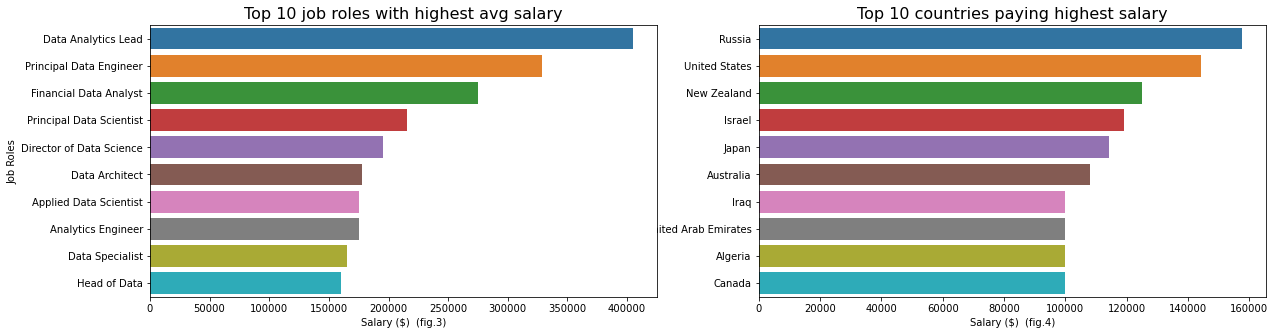

In [25]:
# Top 10 countries paying highest avg salaries

plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.barplot(top_country_salary , top_country_salary.index)
plt.title("Top 10 countries paying highest salary",fontdict={"fontsize":16})
plt.xlabel("Salary ($)  (fig.4)",fontdict={"fontsize":10})
plt.ylabel("Countries",fontdict={"fontsize":10})

# Top 10 job roles with highest avg salary

plt.subplot(1,2,1)
top_jobtitle_salary = df.groupby('job_title')['salary'].mean().sort_values(ascending = False)[:10]
sns.barplot(top_jobtitle_salary, top_jobtitle_salary.index)
plt.title("Top 10 job roles with highest avg salary",fontdict={"fontsize":16})
plt.xlabel("Salary ($)  (fig.3)",fontdict={"fontsize":10})
plt.ylabel("Job Roles",fontdict={"fontsize":10})
plt.show()

# Observation based on fig.3
#### 1) Data Analytics Lead is the top 1st role with the highest avg salary 4L US Dollar
#### 2) Principal Data Engineer, Financial Data Analyst, Principal Data Scientist and Director of Data Science are among top 5 highest avg salary job roles.
# Observation based on fig.4
#### 1) Russia is the top 1st country pays highest avg salary for data science role
#### 2) The US, New Zealand, Israel, and Japan are among the top 5 countries with the highest average salaries for data science roles

In [26]:
# Salary based on Experience level

experienceVssalary = df.groupby('experience_level')['salary'].mean().sort_values(ascending=False)

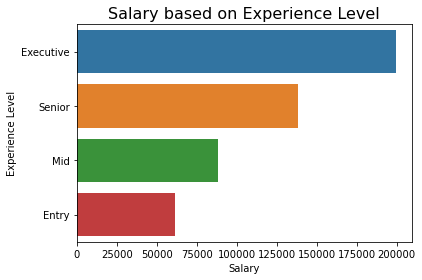

In [27]:
sns.barplot(experienceVssalary,experienceVssalary.index)
plt.xlabel("Salary",fontdict={"fontsize":10})
plt.ylabel("Experience Level",fontdict={"fontsize":10})
plt.title("Salary based on Experience Level",fontdict={"fontsize":16})
plt.show()

#### QUES: WHICH TYPE OF WORK HAVING THE LARGEST JOB VACCANCIES ?

In [28]:
df['remote_ratio'].value_counts()

Remote    381
Onsite    127
Hybrid     99
Name: remote_ratio, dtype: int64

# Observations:
#### 1) The category of remote work has the largest count of job vacancies